In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
import cv2
import keras
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dropout
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential


Using TensorFlow backend.


In [2]:
data=pd.read_csv("../input/digit-recognizer/train.csv")
test_data=pd.read_csv("../input/digit-recognizer/test.csv")

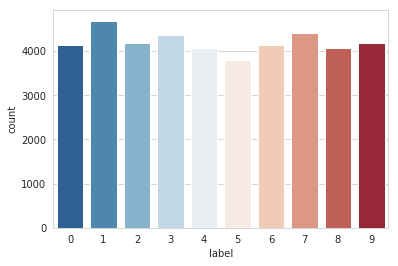

In [3]:
sns.set_style('whitegrid')
sns.countplot(x='label',data=data,palette='RdBu_r')

In [4]:
X_train=data.iloc[:,1:].values
Y_train=data.iloc[:,0].values
X_test=test_data.values

In [5]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test  = StandardScaler().fit_transform(X_test)

In [6]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


In [7]:
num_classes = 10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
print(Y_train[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

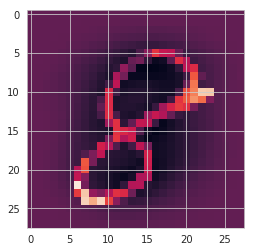

In [9]:
plt.imshow(X_train[0][:,:,0])

In [10]:
model=Sequential()
model.add(Convolution2D(32,3,3,input_shape=(28,28,1),activation="relu",kernel_initializer='he_normal'))
model.add(Convolution2D(32,3, 3, activation = 'relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Convolution2D(64,3, 3, activation = 'relu', kernel_initializer='he_normal'))
model.add(Convolution2D(64,3, 3, activation = 'relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Convolution2D(128,3, 3, activation = 'relu',kernel_initializer='he_normal'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(output_dim=264,init='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_dim=10,init='uniform',activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", kernel_initializer="he_normal")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal")`
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `C

In [11]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    vertical_flip=False)
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),validation_data = (X_val,Y_val),
                    steps_per_epoch=len(X_train) // 32, epochs=80)


Epoch 1/80
1181/1181 [==============================] - 17s 14ms/step - loss: 0.8770 - accuracy: 0.7135 - val_loss: 0.1630 - val_accuracy: 0.9560
Epoch 2/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.3053 - accuracy: 0.9115 - val_loss: 0.0646 - val_accuracy: 0.9838
Epoch 3/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.2185 - accuracy: 0.9370 - val_loss: 0.0621 - val_accuracy: 0.9850
Epoch 4/80
1181/1181 [==============================] - 15s 12ms/step - loss: 0.1879 - accuracy: 0.9480 - val_loss: 0.0523 - val_accuracy: 0.9864
Epoch 5/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.1579 - accuracy: 0.9561 - val_loss: 0.0416 - val_accuracy: 0.9871
Epoch 6/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.1475 - accuracy: 0.9588 - val_loss: 0.0357 - val_accuracy: 0.9876
Epoch 7/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.1428 - accuracy: 0.9601 - val_loss: 0.0394 -

Epoch 57/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.0736 - accuracy: 0.9805 - val_loss: 0.0257 - val_accuracy: 0.9914
Epoch 58/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.0727 - accuracy: 0.9810 - val_loss: 0.0361 - val_accuracy: 0.9914
Epoch 59/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.0703 - accuracy: 0.9820 - val_loss: 0.0307 - val_accuracy: 0.9919
Epoch 60/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.0715 - accuracy: 0.9811 - val_loss: 0.0247 - val_accuracy: 0.9921
Epoch 61/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.0747 - accuracy: 0.9801 - val_loss: 0.0271 - val_accuracy: 0.9936
Epoch 62/80
1181/1181 [==============================] - 14s 12ms/step - loss: 0.0720 - accuracy: 0.9816 - val_loss: 0.0245 - val_accuracy: 0.9940
Epoch 63/80
1181/1181 [==============================] - 15s 13ms/step - loss: 0.0728 - accuracy: 0.9811 - val_loss: 0

In [ ]:
#Without data augmentation
#model.fit(X_train, Y_train, batch_size = 32, epochs = 30,validation_data = (X_val, Y_val), verbose = 2)

In [12]:
Y_pred=model.predict(X_val)

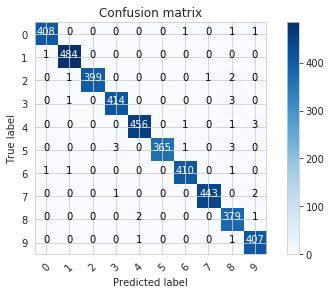

In [13]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [14]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import metrics
# logreg=LogisticRegression()
# logreg.fit(X_train,Y_train)
# predict=logreg.predict(X_test)
# metrics.accuracy_score(Y_test,predict)

In [15]:
sample=pd.read_csv("../input/digit-recognizer/sample_submission.csv")
X_test.shape

FileNotFoundError: [Errno 2] File b'sample_submission.csv' does not exist: b'sample_submission.csv'

In [ ]:
predict=model.predict(X_test) 


In [ ]:
pred=np.argmax(predict,axis=1)
pred[:5]

In [ ]:
d={"ImageId":sample["ImageId"],"Label":pred.astype(np.int32)}
check=pd.DataFrame(d)
check.to_csv("result.csv",index=False)

In [0]:
import pandas as pd
sample_submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
train = pd.read_csv("../input/digit-recognizer/train.csv")